<a href="https://colab.research.google.com/github/captkirk96/fluted-rollers/blob/main/roller_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/datasets/train'
test_path = '/content/drive/MyDrive/datasets/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/datasets (1)/test (1)/*')
print(folders)


['/content/drive/MyDrive/datasets (1)/test (1)/accepted (1)', '/content/drive/MyDrive/datasets (1)/test (1)/rejected (1)']


In [ ]:

x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:

from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:

train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 220 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 123 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=5,
  validation_steps=len(test_set),
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)


<ipython-input-17-af58a25050db>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/30

Epoch 1: val_loss improved from inf to 3.10675, saving model to mymodel.h5
5/5 - 5s - loss: 1.3030 - accuracy: 0.8077 - val_loss: 3.1067 - val_accuracy: 0.6829 - 5s/epoch - 1s/step
Epoch 2/30

Epoch 2: val_loss improved from 3.10675 to 2.63338, saving model to mymodel.h5
5/5 - 5s - loss: 1.4847 - accuracy: 0.7949 - val_loss: 2.6334 - val_accuracy: 0.6667 - 5s/epoch - 972ms/step
Epoch 3/30

Epoch 3: val_loss did not improve from 2.63338
5/5 - 5s - loss: 1.2900 - accuracy: 0.8397 - val_loss: 2.8726 - val_accuracy: 0.6667 - 5s/epoch - 942ms/step
Epoch 4/30

Epoch 4: val_loss did not improve from 2.63338
5/5 - 5s - loss: 1.8879 - accuracy: 0.7115 - val_loss: 2.9288 - val_accuracy: 0.6585 - 5s/epoch - 954ms/step
Epoch 5/30

Epoch 5: val_loss did not improve from 2.63338
5/5 - 5s - loss: 1.4296 - accuracy: 0.8269 - val_loss: 3.0353 - val_accuracy: 0.6423 - 5s/epoch - 966ms/step
Epoch 6/30

Epoch 6: val_loss did not improve from 2.63338
5/5 - 5s - loss: 1.3896 - accuracy: 0.7692 -

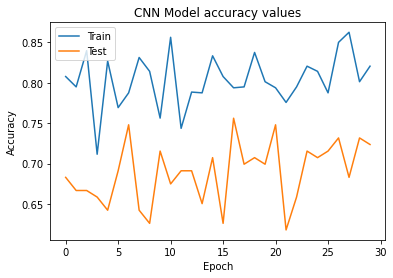

In [ ]:

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
